In [8]:
import pandas as pd
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
mydata=pd.read_excel('D:\Seminar Matematika\Data Historis Unilever.xlsx')
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  97 non-null     datetime64[ns]
 1   Close    97 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


,Tanggal,Close
0,2020-04-29,8000
1,2020-04-30,8275
2,2020-05-04,7925
3,2020-05-05,8300
4,2020-05-06,8100


In [6]:
#Menentukan himpunan semesta pembicaraan (U)
U=[round(min(mydata['Close'])),round(max(mydata['Close']))]
D1=10
D2=5 #Suka - suka wkwk
U=[U[0]-D1,U[1]+D2]
print(U)

[7740, 8580]


In [7]:
#Menentukan panjang interval (R)
R=U[1]-U[0]
R=round(R,2) #pembulatan
print(R)

840


In [23]:
#Menentukan banyaknya interval kelas
n=len(mydata)
K=1+3.3*math.log10(n)
K=round(K) #ini ga tau penting atau engga
print(K)

8


In [13]:
#Menentukan lebar interval
L=R/K
print(L)

105.0


In [16]:
#Mendefinisikan himpunan fuzzy dan menentukan nilai tengah
I=list()
Interval=list()
m=list()
a=U[0]
for i in range(K):
    I.append('A'+str(i+1))
    Interval.append((a,round(a+L,3)))
    m.append((a+round(a+L,3))/2)
    a=round(a+L,3)
data_tabel={'Himpunan Fuzzy' : I,
              'Interval' : Interval,
              'Nilai Tengah' : m}
df1=pd.DataFrame(data_tabel)
df1.head(10)

,Himpunan Fuzzy,Interval,Nilai Tengah
0,A1,"(7740, 7845.0)",7792.5
1,A2,"(7845.0, 7950.0)",7897.5
2,A3,"(7950.0, 8055.0)",8002.5
3,A4,"(8055.0, 8160.0)",8107.5
4,A5,"(8160.0, 8265.0)",8212.5
5,A6,"(8265.0, 8370.0)",8317.5
6,A7,"(8370.0, 8475.0)",8422.5
7,A8,"(8475.0, 8580.0)",8527.5


In [18]:
#Membuat tabel Fuzzy Logical Relationship (FLR)
fuzzyfikasi=list()
relasi=list()
r=0
for i in range(n):
    for j in range(K):
        if mydata['Close'][i]>=df1['Interval'][j][0] and mydata['Close'][i]<=df1['Interval'][j][1]:
            fuzzyfikasi.append(df1['Himpunan Fuzzy'][j])
            if r==0:
                relasi.append('-')
            else:
                relasi.append(r+'->'+df1['Himpunan Fuzzy'][j])
            r=df1['Himpunan Fuzzy'][j]
            break
        else:
            continue
data_aktual={'Tanggal' : mydata['Tanggal'],
             'Data' : mydata['Close'],
             'Fuzzyfikasi' : fuzzyfikasi,
             'Relasi' : relasi}
df2=pd.DataFrame(data_aktual)
df2.head(8)

,Tanggal,Data,Fuzzyfikasi,Relasi
0,2020-04-29,8000,A3,-
1,2020-04-30,8275,A6,A3->A6
2,2020-05-04,7925,A2,A6->A2
3,2020-05-05,8300,A6,A2->A6
4,2020-05-06,8100,A4,A6->A4
5,2020-05-08,8050,A3,A4->A3
6,2020-05-11,8075,A4,A3->A4
7,2020-05-12,8175,A5,A4->A5


In [19]:
df2.tail(8)

,Tanggal,Data,Fuzzyfikasi,Relasi
89,2020-09-15,8100,A4,A5->A4
90,2020-09-16,8000,A3,A4->A3
91,2020-09-17,8075,A4,A3->A4
92,2020-09-18,8025,A3,A4->A3
93,2020-09-21,8000,A3,A3->A3
94,2020-09-22,7950,A2,A3->A2
95,2020-09-23,7925,A2,A2->A2
96,2020-09-24,8000,A3,A2->A3


In [27]:
#Membuat Fuzzy Logic Relationship Group
grup=list()
FLR=list()
for i in range(len(I)):
    grup.append('Grup '+str(i+1))
    FLR1=list()
    for j in range(1,n):
        if relasi[j][1:3]==str(i+1):
            FLR1.append(fuzzyfikasi[j])
        elif relasi[j][1:3]==str(i+1)+'-':
            FLR1.append(fuzzyfikasi[j])
        else:
            pass
    FLR2='A'+str(i+1)+'->'
    for ii in range(len(FLR1)):
        FLR2+=FLR1[ii]+','
    FLR2=FLR2[:-1]
    FLR.append(FLR2)
        
data_FLRG={'Grup' : grup,
           'Himpunan Fuzzy' : I,
           'FLR' : FLR}
df3=pd.DataFrame(data_FLRG)
df3.head(K)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"A1->A4,A3"
1,Grup 2,A2,"A2->A6,A2,A2,A2,A1,A2,A2,A4,A3,A2,A3"
2,Grup 3,A3,"A3->A6,A4,A4,A1,A5,A3,A3,A3,A4,A2,A2,A4,A4,A3,..."
3,Grup 4,A4,"A4->A3,A5,A5,A5,A2,A3,A3,A4,A4,A3,A4,A5,A4,A3,..."
4,Grup 5,A5,"A5->A5,A6,A3,A3,A5,A3,A6,A5,A5,A6,A7,A5,A5,A5,..."
5,Grup 6,A6,"A6->A2,A4,A8,A5,A6,A6,A3,A5"
6,Grup 7,A7,"A7->A5,A5,A7,A7,A5"
7,Grup 8,A8,A8->A7


In [28]:
#FLRG Pengulangan
#Catatan : Untuk run code ini, sebaiknya run yang sebelumnya terlebih dahulu agar terhindar dari error
for i in range(len(df3)):
    bb=df3['FLR'][i]
    if i>=0 and i<=8:
        bb=bb[4:]
    elif i>=9:
        bb=bb[5:]
    bb=bb.split(',')
    cc=list()
    for ii in range(len(bb)):
        if bb[ii] in cc:
            pass
        else:
            cc.append(bb[ii])
    dd=list()
    for j in range(len(cc)):
        k=0
        for jj in range(len(bb)):
            if cc[j]==bb[jj]:
                k+=1
            else:
                pass
        dd.append(str(k)+'('+cc[j]+')')
    df3['FLR'][i]=dd
df3.head(K)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"[1(A4), 1(A3)]"
1,Grup 2,A2,"[1(A6), 6(A2), 1(A1), 1(A4), 2(A3)]"
2,Grup 3,A3,"[2(A6), 7(A4), 1(A1), 2(A5), 8(A3), 3(A2)]"
3,Grup 4,A4,"[7(A3), 5(A5), 1(A2), 4(A4)]"
4,Grup 5,A5,"[17(A5), 3(A6), 4(A3), 2(A7), 3(A4)]"
5,Grup 6,A6,"[1(A2), 1(A4), 1(A8), 2(A5), 2(A6), 1(A3)]"
6,Grup 7,A7,"[3(A5), 2(A7)]"
7,Grup 8,A8,[1(A7)]


In [29]:
#Pembuatan DataFrame Pembobotan Fuzzy
A=list()
o=list()
for i in range(len(df3)):
    A.append('A'+str(i+1))
    o.append(0)
df4={'X(t-1)' : A}
for i in range(len(df3)):
    df4[A[i]]=o
df4=pd.DataFrame(df4)
df4.head(K)

,X(t-1),A1,A2,A3,A4,A5,A6,A7,A8
0,A1,0,0,0,0,0,0,0,0
1,A2,0,0,0,0,0,0,0,0
2,A3,0,0,0,0,0,0,0,0
3,A4,0,0,0,0,0,0,0,0
4,A5,0,0,0,0,0,0,0,0
5,A6,0,0,0,0,0,0,0,0
6,A7,0,0,0,0,0,0,0,0
7,A8,0,0,0,0,0,0,0,0


In [31]:
#Input Bobot Ke Dalam Matriks Pembobobotan Fuzzy
for i in range(len(df3)):
    x=df3['FLR'][i]
    for j in range(len(x)):
        y=x[j].split('(')
        y2=y[1]
        df4[y2[:-1]][i]=int(y[0])
for i in range(len(df4)):
    df4[A[i]]=df4[A[i]].astype(float)
df4.info()
df4.head(K)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(t-1)  8 non-null      object 
 1   A1      8 non-null      float64
 2   A2      8 non-null      float64
 3   A3      8 non-null      float64
 4   A4      8 non-null      float64
 5   A5      8 non-null      float64
 6   A6      8 non-null      float64
 7   A7      8 non-null      float64
 8   A8      8 non-null      float64
dtypes: float64(8), object(1)
memory usage: 704.0+ bytes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,X(t-1),A1,A2,A3,A4,A5,A6,A7,A8
0,A1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,A2,1.0,6.0,2.0,1.0,0.0,1.0,0.0,0.0
2,A3,1.0,3.0,8.0,7.0,2.0,2.0,0.0,0.0
3,A4,0.0,1.0,7.0,4.0,5.0,0.0,0.0,0.0
4,A5,0.0,0.0,4.0,3.0,17.0,3.0,2.0,0.0
5,A6,0.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
6,A7,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
7,A8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
#Pembobotan Normalisasi
Bobot_Norm=df4.drop(['X(t-1)'],axis=1)
Bobot_Norm=Bobot_Norm.values
for i in range(len(Bobot_Norm)):
    jum=sum(Bobot_Norm[i])
    for j in range(len(Bobot_Norm)):
        ele=float(Bobot_Norm[i][j])
        Bobot_Norm[i][j]=ele/jum
print(Bobot_Norm)

[[0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.09090909 0.54545455 0.18181818 0.09090909 0.         0.09090909
  0.         0.        ]
 [0.04347826 0.13043478 0.34782609 0.30434783 0.08695652 0.08695652
  0.         0.        ]
 [0.         0.05882353 0.41176471 0.23529412 0.29411765 0.
  0.         0.        ]
 [0.         0.         0.13793103 0.10344828 0.5862069  0.10344828
  0.06896552 0.        ]
 [0.         0.125      0.125      0.125      0.25       0.25
  0.         0.125     ]
 [0.         0.         0.         0.         0.6        0.
  0.4        0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]]


In [33]:
#Perkalian Elemen Bobot Normalisasi dengan Median (m1 X Bobot A1)
M=list()
for i in range(len(Bobot_Norm)):
    Mn=list()
    for j in range(len(Bobot_Norm)):
        Mnn=Bobot_Norm[i][j]*df1['Nilai Tengah'][j]
        Mn.append(Mnn)
    M.append(Mn)
print(M)

[[0.0, 0.0, 4001.25, 4053.75, 0.0, 0.0, 0.0, 0.0], [708.4090909090909, 4307.727272727272, 1455.0, 737.0454545454546, 0.0, 756.1363636363636, 0.0, 0.0], [338.80434782608694, 1030.108695652174, 2783.478260869565, 2467.5, 714.1304347826086, 723.2608695652174, 0.0, 0.0], [0.0, 464.55882352941177, 3295.1470588235293, 1907.6470588235293, 2415.4411764705883, 0.0, 0.0, 0.0], [0.0, 0.0, 1103.7931034482758, 838.7068965517241, 4814.224137931034, 860.4310344827586, 580.8620689655172, 0.0], [0.0, 987.1875, 1000.3125, 1013.4375, 2053.125, 2079.375, 0.0, 1065.9375], [0.0, 0.0, 0.0, 0.0, 4927.5, 0.0, 3369.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8422.5, 0.0]]


In [36]:
#Pembuatan Data Frame Peramalan
t=list()
for i in range(n):
    t.append(i+1)
df6={'t' : t,
     'Tanggal' : mydata['Tanggal'],
     'Data' : mydata['Close']}
Ft=list()
Ft.append(0)
for i in range(1,n):
    Wn=df2['Fuzzyfikasi'][i-1]
    Wn=int(Wn[1:])
    jum_norm=sum(M[Wn-1])
    Ft.append(jum_norm)
df6['Peramalan F(t)']=Ft
df6=pd.DataFrame(df6)
df6.info()
df6.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   t               97 non-null     int64         
 1   Tanggal         97 non-null     datetime64[ns]
 2   Data            97 non-null     int64         
 3   Peramalan F(t)  97 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


,t,Tanggal,Data,Peramalan F(t)
0,1,2020-04-29,8000,0.000000
1,2,2020-04-30,8275,8057.282609
2,3,2020-05-04,7925,8199.375000
3,4,2020-05-05,8300,7964.318182
4,5,2020-05-06,8100,8199.375000
5,6,2020-05-08,8050,8082.794118
6,7,2020-05-11,8075,8057.282609
7,8,2020-05-12,8175,8082.794118


In [37]:
df6.tail(8)

,t,Tanggal,Data,Peramalan F(t)
89,90,2020-09-15,8100,8198.017241
90,91,2020-09-16,8000,8082.794118
91,92,2020-09-17,8075,8057.282609
92,93,2020-09-18,8025,8082.794118
93,94,2020-09-21,8000,8057.282609
94,95,2020-09-22,7950,8057.282609
95,96,2020-09-23,7925,7964.318182
96,97,2020-09-24,8000,7964.318182


In [38]:
#Menghitung Nilai Error (|e|)
df7={'t' : df6['t'],
     'Tanggal' : df6['Tanggal'],
     'Data' : df6['Data'],
     'Peramalan F(t)' : df6['Peramalan F(t)']}
e=list()
e.append(0)
for i in range(1,len(df6)):
    ee=df6['Data'][i]-df6['Peramalan F(t)'][i]
    ee=math.sqrt(ee**2)
    e.append(ee)
df7['Error']=e
df7=pd.DataFrame(df7)
df7.info()
df7.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   t               97 non-null     int64         
 1   Tanggal         97 non-null     datetime64[ns]
 2   Data            97 non-null     int64         
 3   Peramalan F(t)  97 non-null     float64       
 4   Error           97 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 3.9 KB


,t,Tanggal,Data,Peramalan F(t),Error
0,1,2020-04-29,8000,0.000000,0.000000
1,2,2020-04-30,8275,8057.282609,217.717391
2,3,2020-05-04,7925,8199.375000,274.375000
3,4,2020-05-05,8300,7964.318182,335.681818
4,5,2020-05-06,8100,8199.375000,99.375000
5,6,2020-05-08,8050,8082.794118,32.794118
6,7,2020-05-11,8075,8057.282609,17.717391
7,8,2020-05-12,8175,8082.794118,92.205882


In [39]:
df7.tail(8)

,t,Tanggal,Data,Peramalan F(t),Error
89,90,2020-09-15,8100,8198.017241,98.017241
90,91,2020-09-16,8000,8082.794118,82.794118
91,92,2020-09-17,8075,8057.282609,17.717391
92,93,2020-09-18,8025,8082.794118,57.794118
93,94,2020-09-21,8000,8057.282609,57.282609
94,95,2020-09-22,7950,8057.282609,107.282609
95,96,2020-09-23,7925,7964.318182,39.318182
96,97,2020-09-24,8000,7964.318182,35.681818


In [40]:
#Menentukan MAE atau MSE
N=len(e)
MAE=sum(e)/N
e_kuadrat=list()
for i in range(N):
    e_kuadrat.append(e[i]**2)
MSE=sum(e_kuadrat)/N
RMSE=math.sqrt(MSE)
print('Nilai MAE adalah ', MAE)
print('Nilai MSE adalah ', MSE)
print('Nilai RMSE adalah ', RMSE)

Nilai MAE adalah  79.74781303184882
Nilai MSE adalah  12283.706823661743
Nilai RMSE adalah  110.83188541057011


<function matplotlib.pyplot.show(*args, **kw)>

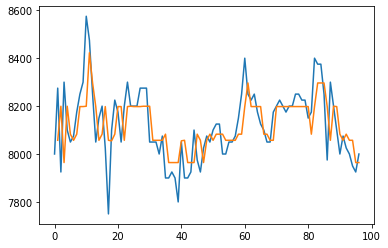

In [41]:
plt.plot(df7['Data'])
plt.plot(df7['Peramalan F(t)'][1:])
plt.show